In [1]:
import numba as nb
import numpy as np
import pickle as pkl

### Coupon Collector's Problem

$1$ coupon each time

In [2]:
@nb.jit(nopython=True)
def coupon(m):
    coupons = set()  # coupon set
    count = 0

    while True:
        x = np.random.randint(m)  # generate a coupon x randomly
        coupons.add(x)  # add the new coupon x to the coupon set
        count = count + 1
        if len(coupons) == m:  # all m types of coupons have been collected
            break

    return count

Test the average times for $m = 20$ coupons.

In [3]:
count_list = []

for i in range(10000):
    count = coupon(20)
    count_list.append(count)

count_array = np.array(count_list)
print(count_array.mean(), count_array.max())

71.5682 233


$k$ ($k\ge 2$) coupons each time

In [4]:
@nb.jit(nopython=True)
def coupon_k(m, k):
    coupons = set()  # coupon set
    count = 0

    while True:
        x = np.random.choice(m, size=k, replace=False)  # generate k coupons (k >= 1, without repetition) randomly
        # coupons = coupons | set(x)
        for i in range(k):  # add the k new coupons to the coupon set
            coupons.add(x[i])
        count = count + 1
        if len(coupons) == m:  # all m types of coupons have been collected
            break

    return count

Test the average times for $m = 10$ coupons, and each time we choose $k = 3$ coupons.

In [5]:
count_list = []

for i in range(10000):
    count = coupon_k(10, 3)
    count_list.append(count)

count_array = np.array(count_list)
print(count_array.mean(), count_array.max())

9.0348 31


### Complete Graph Covering Problem

The results of the complete graph covering problem are equivalent to the average sampling times of $\pi$-SGD: Suppose we sample a permutation of $n$ nodes randomly at each time. How many times does it take on average before any two nodes have become neighbors at least once?

In [6]:
@nb.jit(nopython=True)
def cover(n):
    edges = set()  # edge set
    count = 0
    num_edges = int(n * (n-1))  # 2 * the number of edges in a complete graph K_n

    while True:
        p = np.random.permutation(n)  # generate an n-permutation (Hamiltonian path) randomly
        count = count + 1

        for k in range(n-1):  # construct the corresponding edges in the n-permutation (Hamiltonian path)
            e = (p[k], p[k+1])  # construct a new directed edge e
            edges.add(e)  # add the new edge e to the edge set
            ##### please comment out the next line for directed cases #####
            e_rvs = (p[k+1], p[k])  # reverse the directed edge e
            edges.add(e_rvs)  # add the reversely directed edge e_rvs to the edge set

        if len(edges) == num_edges:  # the complete graph K_n has been covered
            break

    return count

Test the average times for $n = 10$ nodes.

In [7]:
count_list = []

for i in range(10000):
    count = cover(10)
    count_list.append(count)

count_array = np.array(count_list)
print(count_array.mean(), count_array.max())

20.2659 55


### Comparison of Results

Calculate the results of coupon collector's problem, with the number of nodes $n$ taken from 1 to 100.

In [8]:
coupon_result = []

for n in range(1, 101):
    k = n - 1
    m = int(n * (n-1) / 2)  # m = int(n * (n-1)) for directed cases
    coupon_list = []
    for i in range(10000):
        count_coupon = coupon_k(m, k)
        coupon_list.append(count_coupon)
    coupon_array = np.array(coupon_list)
    coupon_result.append(coupon_array.mean())
    # print(n, coupon_array.mean())

# with open("coupon_result.pickle", 'wb') as f:
#     pkl.dump(coupon_result, f)

Calculate the results of complete graph covering problem, with the number of nodes $n$ taken from 1 to 100.

In [9]:
cover_result = []

for n in range(1, 101):
    cover_list = []
    for i in range(10000):
        count_cover = cover(n)
        cover_list.append(count_cover)
    cover_array = np.array(cover_list)
    cover_result.append(cover_array.mean())
    # print(n, cover_array.mean())

# with open("cover_result.pickle", 'wb') as f:
#     pkl.dump(cover_result, f)

Comparison

In [10]:
print("n \t Coupon \t Cover (avg times)")
print("-" * 45)
for i in range(len(coupon_result)):
    print(i+1, '\t %.4f \t %.4f' % (coupon_result[i], cover_result[i]))

n 	 Coupon 	 Cover (avg times)
---------------------------------------------
1 	 1.0000 	 1.0000
2 	 1.0000 	 1.0000
3 	 2.5016 	 2.4903
4 	 4.3077 	 4.1853
5 	 6.4788 	 6.2963
6 	 8.9973 	 8.8005
7 	 11.5271 	 11.4270
8 	 14.3898 	 14.2770
9 	 17.3706 	 17.1989
10 	 20.4025 	 20.3587
11 	 23.6067 	 23.5219
12 	 26.9507 	 26.9066
13 	 30.3139 	 30.3203
14 	 33.6650 	 33.6813
15 	 37.2587 	 37.3975
16 	 40.9407 	 40.9211
17 	 44.3883 	 44.5882
18 	 48.2013 	 48.3560
19 	 52.1807 	 52.0115
20 	 55.8813 	 56.0006
21 	 59.7106 	 59.7283
22 	 63.8763 	 63.8467
23 	 68.0442 	 67.9674
24 	 71.8257 	 71.8489
25 	 75.8020 	 76.0521
26 	 80.0733 	 80.1358
27 	 84.0834 	 84.1769
28 	 88.4062 	 88.6117
29 	 92.5969 	 92.4745
30 	 97.5968 	 96.6826
31 	 101.3657 	 101.4580
32 	 105.4870 	 105.7047
33 	 110.3723 	 110.0195
34 	 114.0602 	 113.6935
35 	 118.8359 	 118.9461
36 	 123.9651 	 123.9354
37 	 127.7166 	 128.4499
38 	 132.0647 	 132.0986
39 	 137.2611 	 137.3284
40 	 141.6260 	 141.4073
41 	

### Plot for Results

In [11]:
import matplotlib.pyplot as plt
from IPython.display import Latex

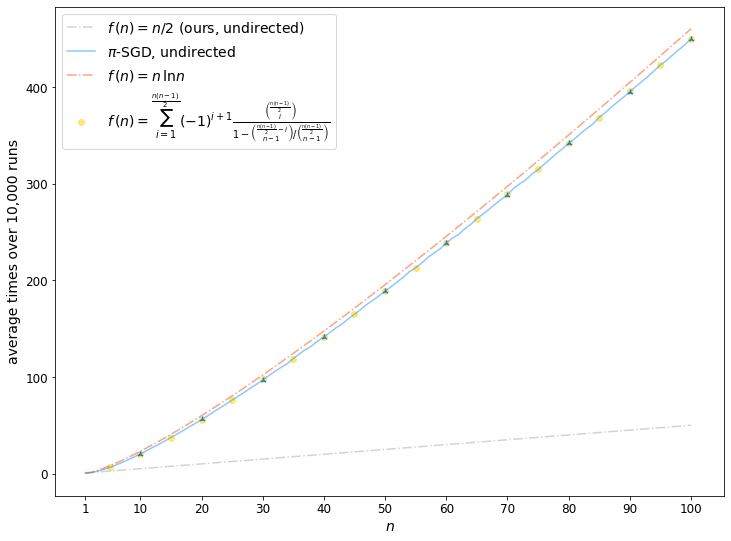

In [12]:
coupon_label = r"$f\,(n) = \sum_{i=1}^{\frac{n(n-1)}{2}} {(-1)^{i+1} \frac{\binom {\frac{n(n-1)}{2}} {i}} {1-{\binom {\frac{n(n-1)}{2}-i} {n-1}} / {\binom {\frac{n(n-1)}{2}} {n-1}}}}$"
dicoupon_label = r"$f\,(n) = \sum_{i=1}^{n(n-1)} {(-1)^{i+1} \frac{\binom {n(n-1)} {i}} {1-{\binom {n(n-1)-i} {n-1}} / {\binom {n(n-1)} {n-1}}}}$"

plt.figure(figsize=(12, 9))

plt.plot(range(1, 101), [i/2 for i in range(1, 101)], color='darkgray', alpha=0.5, linestyle='-.', label=r"$f\,(n) = n/2$ (ours, undirected)")
plt.plot(range(1, 101), cover_result, color='dodgerblue', alpha=0.5, label="$\pi$-SGD, undirected")
plt.plot(range(1, 101), [i * np.log(i) for i in range(1, 101)], color='orangered', alpha=0.5, linestyle='-.', label=r"$f\,(n) = n\,\ln n$")

# plt.scatter(range(10, 101, 10), [i/2 for i in range(10, 101, 10)], color='gray', marker='2')
plt.scatter(range(10, 101, 10), cover_result[9:100:10], marker='2')
plt.scatter(range(5, 101, 5), coupon_result[4:100:5], color='gold', alpha=0.5, label=coupon_label, marker='o', zorder=0)
# plt.scatter(range(10, 101, 10), [i * np.log(i) for i in range(10, 101, 10)], marker='2')

plt.xlabel("$n$", fontsize=14)
plt.ylabel("average times over 10,000 runs", fontsize=14)
plt.xticks([1,10,20,30,40,50,60,70,80,90,100], ['1','10','20','30','40','50','60','70','80','90','100'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()